In [1]:
# 使用西雅图酒店数据集，对用户选中的酒店进行相关推荐
# https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Seattle_Hotels.csv
# 数据格式: name address desc

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 数据探索
df = pd.read_csv("Seattle_Hotels.csv",encoding="latin-1")
print(df.head())
print(len(df))

                             name  \
0  Hilton Garden Seattle Downtown   
1          Sheraton Grand Seattle   
2   Crowne Plaza Seattle Downtown   
3   Kimpton Hotel Monaco Seattle    
4              The Westin Seattle   

                                           address  \
0  1821 Boren Avenue, Seattle Washington 98101 USA   
1   1400 6th Avenue, Seattle, Washington 98101 USA   
2                  1113 6th Ave, Seattle, WA 98101   
3                   1101 4th Ave, Seattle, WA98101   
4   1900 5th Avenue, Seattle, Washington 98101 USA   

                                                desc  
0  Located on the southern tip of Lake Union, the...  
1  Located in the city's vibrant core, the Sherat...  
2  Located in the heart of downtown Seattle, the ...  
3  What?s near our hotel downtown Seattle locatio...  
4  Situated amid incredible shopping and iconic a...  
152


In [21]:
# 得到指定酒店的desc
def print_description(index):
    hotel = df[df.index==index][['desc','name']].values[0]
    if(len(hotel)>0):
        print(hotel[0]) # desc
        print("Name: ",hotel[1])
print("指定index的酒店的描述为：")
print_description(0)

指定index的酒店的描述为：
Located on the southern tip of Lake Union, the Hilton Garden Inn Seattle Downtown hotel is perfectly located for business and leisure. 
The neighborhood is home to numerous major international companies including Amazon, Google and the Bill & Melinda Gates Foundation. A wealth of eclectic restaurants and bars make this area of Seattle one of the most sought out by locals and visitors. Our proximity to Lake Union allows visitors to take in some of the Pacific Northwest's majestic scenery and enjoy outdoor activities like kayaking and sailing. over 2,000 sq. ft. of versatile space and a complimentary business center. State-of-the-art A/V technology and our helpful staff will guarantee your conference, cocktail reception or wedding is a success. Refresh in the sparkling saltwater pool, or energize with the latest equipment in the 24-hour fitness center. Tastefully decorated and flooded with natural light, our guest rooms and suites offer everything you need to relax and st

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35789 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py

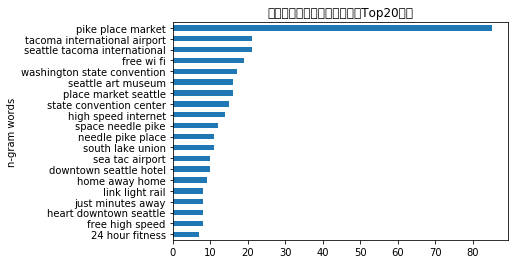

In [52]:
# 得到酒店描述中的n-gram特征中的TOP-K个
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
def get_top_k_words(corpus,n=1,k=None):
    # 得到所有n-gram词
    # 一般情况下用2-gram或者3-gram
    vec = CountVectorizer(ngram_range=(n,n),stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus) # 得到词频矩阵
    """
    print(vec.get_feature_names())
    print(bag_of_words.toarray())
    """
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,index]) for word,index in vec.vocabulary_.items()]
    # 按照词频从大到小排序
    words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
    return words_freq[:k]
top_words = get_top_k_words(df['desc'],3,20)
# print(top_words)
df1= pd.DataFrame(top_words,columns = ['n-gram words','count'])
#print(df1)
df1.groupby('n-gram words').sum()['count'].sort_values().plot(kind='barh', title='去掉停用词后，酒店描述中的Top20单词')
plt.show()

In [57]:
# 文本预处理
import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
# 文本清晰
def clean_text(text):
    text = text.lower() # 全部小写
    text = REPLACE_BY_SPACE_RE.sub(' ',text) # 特殊符号用空格替代
    text = BAD_SYMBOLS_RE.sub('',text) # 移除bad symbols
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # 去掉停用词
    return text
# 对desc字段进行清洗
df['desc_clean'] = df['desc'].apply(clean_text)
#print(df['desc_clean'])
print(df.head())

                             name  \
0  Hilton Garden Seattle Downtown   
1          Sheraton Grand Seattle   
2   Crowne Plaza Seattle Downtown   
3   Kimpton Hotel Monaco Seattle    
4              The Westin Seattle   

                                           address  \
0  1821 Boren Avenue, Seattle Washington 98101 USA   
1   1400 6th Avenue, Seattle, Washington 98101 USA   
2                  1113 6th Ave, Seattle, WA 98101   
3                   1101 4th Ave, Seattle, WA98101   
4   1900 5th Avenue, Seattle, Washington 98101 USA   

                                                desc  \
0  Located on the southern tip of Lake Union, the...   
1  Located in the city's vibrant core, the Sherat...   
2  Located in the heart of downtown Seattle, the ...   
3  What?s near our hotel downtown Seattle locatio...   
4  Situated amid incredible shopping and iconic a...   

                                          desc_clean  
0  located southern tip lake union hilton garden ...  
1  lo

In [64]:
print(df.describe())

                                    address  \
count                                   152   
unique                                  152   
top     4725 25th Ave NE, Seattle, WA 98105   
freq                                      1   

                                                     desc  \
count                                                 152   
unique                                                152   
top     Experience an upscale Pacific Northwest getawa...   
freq                                                    1   

                                               desc_clean  
count                                                 152  
unique                                                152  
top     econo lodgeseatac airport north hotel seattle ...  
freq                                                    1  


In [68]:
# 建模
df.set_index("name",inplace=True)
# 使用TF-IDF提取文本特征
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer="word",ngram_range=(1,3),min_df=0.01,stop_words="english")
tfidf_matrix = tf.fit_transform(df['desc_clean'])
# print(len(tf.get_feature_names())) 3154
print(tfidf_matrix.shape)

(152, 3154)


In [72]:
# 计算酒店之间的余弦相似度
from sklearn.metrics.pairwise import linear_kernel
# 两个矩阵之间的线性关系
cosine_similarities = linear_kernel(tfidf_matrix,tfidf_matrix) 
print(cosine_similarities)

[[1.         0.0391713  0.10519839 ... 0.04506191 0.01188579 0.02732358]
 [0.0391713  1.         0.06121291 ... 0.06131857 0.01508036 0.03706011]
 [0.10519839 0.06121291 1.         ... 0.09179925 0.04235642 0.05607314]
 ...
 [0.04506191 0.06131857 0.09179925 ... 1.         0.0579826  0.04145794]
 [0.01188579 0.01508036 0.04235642 ... 0.0579826  1.         0.0172546 ]
 [0.02732358 0.03706011 0.05607314 ... 0.04145794 0.0172546  1.        ]]


In [73]:
indices = pd.Series(df.index)

In [78]:
# 基于余弦相似度矩阵和指定的酒店Name，推荐top-k酒店
def recommendations(name,k=5,cosine_similarities=cosine_similarities):
    recommended_hotels = []
    index = indices[indices==name].index[0] # 找到想要查询酒店名称的index
    print("index为: ",index)
    score_series = pd.Series(cosine_similarities[index]).sort_values(ascending = False)
    top_k_indexes = list(score_series.iloc[1:k+1].index) # 自己除外
    for i in top_k_indexes:
        recommended_hotels.append(list(df.index)[i])
    return recommended_hotels

In [79]:
print(recommendations('Hilton Seattle Airport & Conference Center',10))

index为:  49
['Embassy Suites by Hilton Seattle Tacoma International Airport', 'DoubleTree by Hilton Hotel Seattle Airport', 'Seattle Airport Marriott', 'Motel 6 Seattle Sea-Tac Airport South', 'Knights Inn Tukwila', 'Four Points by Sheraton Downtown Seattle Center', 'Radisson Hotel Seattle Airport', 'Hampton Inn Seattle/Southcenter', 'Home2 Suites by Hilton Seattle Airport', 'Red Lion Hotel Seattle Airport Sea-Tac']


In [80]:
print(recommendations('The Bacon Mansion Bed and Breakfast'))

index为:  116
['11th Avenue Inn Bed and Breakfast', 'Shafer Baillie Mansion Bed & Breakfast', 'Gaslight Inn', 'Bed and Breakfast Inn Seattle', 'Chittenden House Bed and Breakfast']
